In [ ]:
quatmul <- function(first.quaternion,second.quaternion){
  p <- first.quaternion; q <- second.quaternion
  stopifnot("Quaternions should be entered as 4-element vectors with real part in the first entry." = is.vector(p)&&is.vector(q))
  mat <- matrix(c(p[1],p[2],p[3],p[4],
                  -p[2],p[1],p[4],-p[3],
                  -p[3],-p[4],p[1],p[2],
                  -p[4],p[3],-p[2],p[1]),4,4,byrow=F)
  as.vector(round(mat%*%q,4))
}

In [ ]:
quatmul(c(cos(pi/4),sin(pi/4)/sqrt(2),sin(pi/4)/sqrt(2),0),quatmul(c(0,3,-4,7),c(cos(pi/4),-sin(pi/4)/sqrt(2),-sin(pi/4)/sqrt(2),0)))

[1]  0.0000  4.4497 -5.4497 -4.9498

In [ ]:
rotmat <- function(quaternion){
  p <- quaternion
    stopifnot("Quaternions should be entered as 4-element vectors with real part in the first entry." = is.vector(p))
  mat <- matrix(c(2*(p[1]^2+p[2]^2)-1,2*(p[2]*p[3]+p[1]*p[4]),2*(p[2]*p[4]-p[1]*p[3]),
                  2*(p[2]*p[3]-p[1]*p[4]), 2*(p[1]^2+p[3]^2)-1,2*(p[3]*p[4]+p[1]*p[2]),
                  2*(p[2]*p[4]+p[1]*p[3]),2*(p[3]*p[4]-p[1]*p[2]),2*(p[1]^2+p[4]^2)-1),
                  3,3,byrow=F)
  round(mat,4)
}

In [ ]:
rotmat(c(cos(pi/4),sin(pi/4)/sqrt(2),sin(pi/4)/sqrt(2),0))

0.5000,0.5000,0.7071
0.5000,0.5000,-0.7071
-0.7071,0.7071,0.0000


The quaternion rotation matrix is derived [here](https://en.wikipedia.org/wiki/Quaternions_and_spatial_rotation#Quaternion-derived_rotation_matrix).

In [ ]:
quat3Drot <- function(quaternion1, quaternion2){
  #The second quaternion is just a 3D vector with a 0 in the first entry (real component).
  p <- quaternion1; q <- quaternion2
  stopifnot("Quaternions should be entered as 4-element vectors with real part in the first entry." = is.vector(p)&&is.vector(q))
  mat <- matrix(c(2*(p[1]^2+p[2]^2)-1,2*(p[2]*p[3]+p[1]*p[4]),2*(p[2]*p[4]-p[1]*p[3]),
                  2*(p[2]*p[3]-p[1]*p[4]), 2*(p[1]^2+p[3]^2)-1,2*(p[3]*p[4]+p[1]*p[2]),
                  2*(p[2]*p[4]+p[1]*p[3]),2*(p[3]*p[4]-p[1]*p[2]),2*(p[1]^2+p[4]^2)-1),
                  3,3,byrow=F)
  round(as.vector(mat%*%q[2:4]),4)
}

In [ ]:
quat3Drot(c(cos(pi/4),sin(pi/4)/sqrt(2),sin(pi/4)/sqrt(2),0),c(0,3,-4,7))

[1]  4.4497 -5.4497 -4.9497

In [ ]:
rotate.theta.around <- function(vector2Brotated, axis.of.rot, angle.degrees){
  r <- axis.of.rot
  q <- vector2Brotated
  stopifnot("Enter the axis of rotation and the 3D vector to be rotated both as 3-element vectors." = is.vector(r)&&is.vector(q))
  ax <- r/(sqrt(r[1]^2 + r[2]^2 + r[3]^2))
  radians <- angle.degrees/360 * 2 * pi
  p <- c(cos(radians/2), sin(radians/2)* ax)
  mat <- matrix(c(2*(p[1]^2+p[2]^2)-1,2*(p[2]*p[3]+p[1]*p[4]),2*(p[2]*p[4]-p[1]*p[3]),
                  2*(p[2]*p[3]-p[1]*p[4]), 2*(p[1]^2+p[3]^2)-1,2*(p[3]*p[4]+p[1]*p[2]),
                  2*(p[2]*p[4]+p[1]*p[3]),2*(p[3]*p[4]-p[1]*p[2]),2*(p[1]^2+p[4]^2)-1),
                  3,3,byrow=F)
  round(as.vector(mat%*%vector2Brotated),4)
}

In [ ]:
rotate.theta.around(c(3,-4,7), c(1/sqrt(2),1/sqrt(2),0), 90)

[1]  4.4497 -5.4497 -4.9497

In [ ]:
rotate.theta.around(c(3,-4,7), c(1/sqrt(2),1/sqrt(2),0), 180)

[1] -4  3 -7

In [ ]:
rotate.theta.around(c(3,-4,7), c(2,3,4), 180)

[1]  0.0345  8.5517 -0.9310

In [ ]:
rotate.theta.around(c(4,5,6), c(1,0,0), 180)

[1]  4 -5 -6

In [ ]:
rotate.theta.around(c(1/sqrt(3),1/sqrt(3),1/sqrt(3)),c(1,0,0), 180)

[1]  0.5774 -0.5774 -0.5774

In [ ]:
install.packages('plot3D')
install.packages('graphics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘graphics’ is a base package, and should not be updated”


In [ ]:
library(plot3D)
library(graphics)

Warning message:
“no DISPLAY variable so Tk is not available”


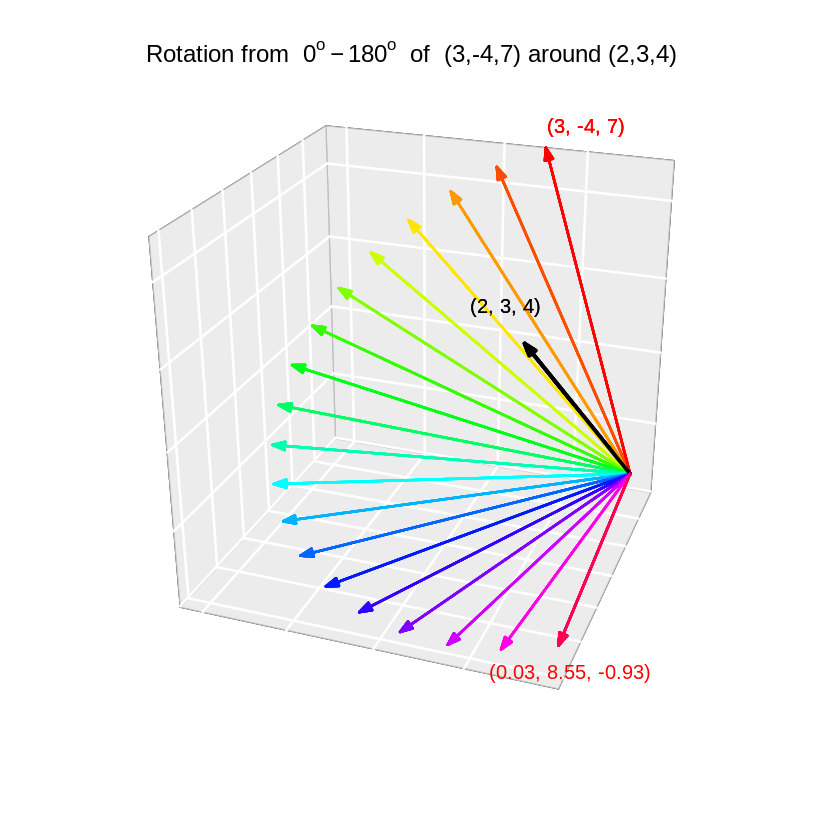

In [ ]:
# Angles to rotate the 3D vector around and axis vector:
ang <- c(seq(0,180,10),180)
n <- length(ang)

# Matrix to store the resulting rotated vector:
m <- matrix(0,n,6)
vec2Brotated <- c(3,-4,7)
vecaxis <- c(2,3,4)

for(i in 1:length(ang)){
  m[i,4:6] <- rotate.theta.around(vec2Brotated, vecaxis, ang[i])
}

arrows3D(m[,1], m[,2], m[,3],
         m[,4], m[,5], m[,6],
         phi=25, theta=200,
         lwd = 2, d = 3, col=rainbow(nrow(m)),
         axes=F,
         main = bquote("Rotation from" ~ 0^o-180^o ~ "of" ~ "(3,-4,7) around (2,3,4)"),
         bty ="g", ticktype = "detailed")

arrows3D(0,0,0,2,3,4, lwd=3, col='black', add=T)
text3D(3, -4, 7+.5, '(3, -4, 7)', col=rainbow(1),
       add=TRUE, colkey = FALSE)
text3D(2+1, 3+1, 4+1, '(2, 3, 4)',
       add=TRUE, colkey = FALSE)
text3D(m[n,4]+1, m[n,5]+2, m[n,6], '(0.03, 8.55, -0.93)', col=rainbow(n),
       add=TRUE, colkey = FALSE)

In [ ]:
rotate.theta.around(c(3,-4,7),c(1/sqrt(2),1/sqrt(2),0), 90)

[1]  4.4497 -5.4497 -4.9497

In [ ]:
sin(pi/4)/sqrt(2)

[1] 0.5

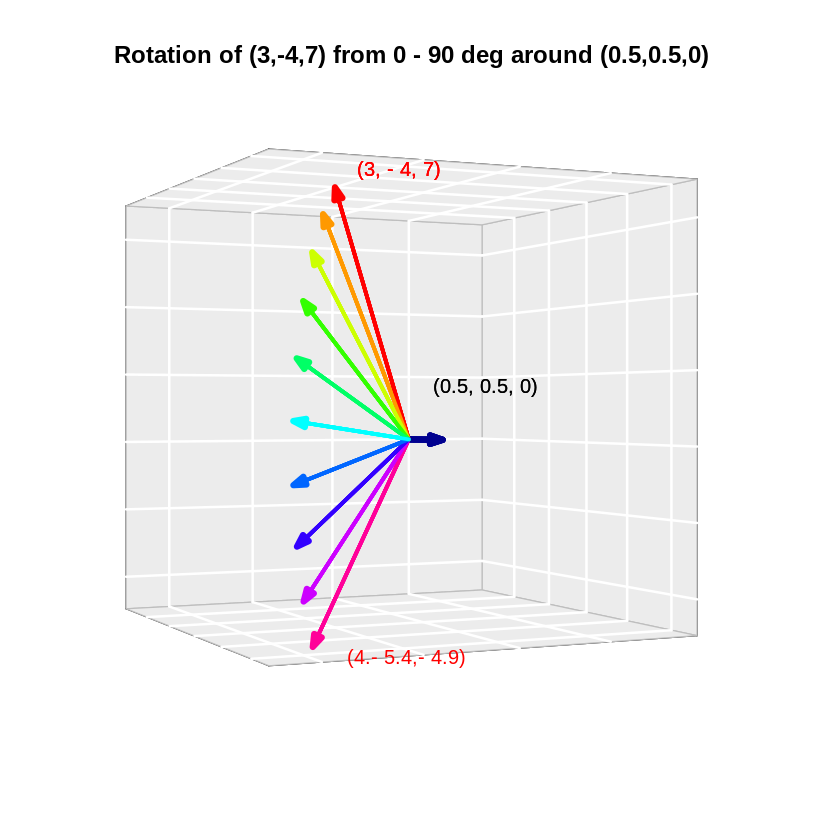

In [ ]:
ang <- seq(0,90,10)
n <- length(ang)
m <- matrix(0,n,6)
for(i in 1:n){
  m[i,4:6] <- rotate.theta.around(c(3,-4,7), c(1/sqrt(2),1/sqrt(2),0), ang[i])
}

arrows3D(m[,1], m[,2], m[,3],
         m[,4], m[,5], m[,6],
         phi=0, theta=65,
         lwd = 3, d = 3, col=c(rainbow(nrow(m))),
         ylim=c(-7,2),
         axes=F,
         main=paste("Rotation of (3,-4,7) from",expression(0-90),"deg around (0.5,0.5,0)"),
       #  main= 'Rotation of (3,-4,7) from 0 to 90 degrees around (sin(pi/4),sin(pi/4),0)',
         bty ="g", ticktype = "detailed")

arrows3D(0,0,0,0.5,0.5,0, lwd=5,add=T, color='black')

text3D(3, -4+.5, 7+.5, '(3, - 4, 7)',
       add=TRUE, colkey = FALSE, col=rainbow(1))
text3D(0.7-2, 0.7+1, 0.7+1, '(0.5, 0.5, 0)',
       add=TRUE, colkey = FALSE)
text3D(m[nrow(m),4]+1, m[nrow(m),5], m[nrow(m),6], '(4.- 5.4,- 4.9)', col=rainbow(nrow(m)),
       add=TRUE, colkey = FALSE)

In [ ]:
sin(pi/4)/sqrt(2)

[1] 0.5

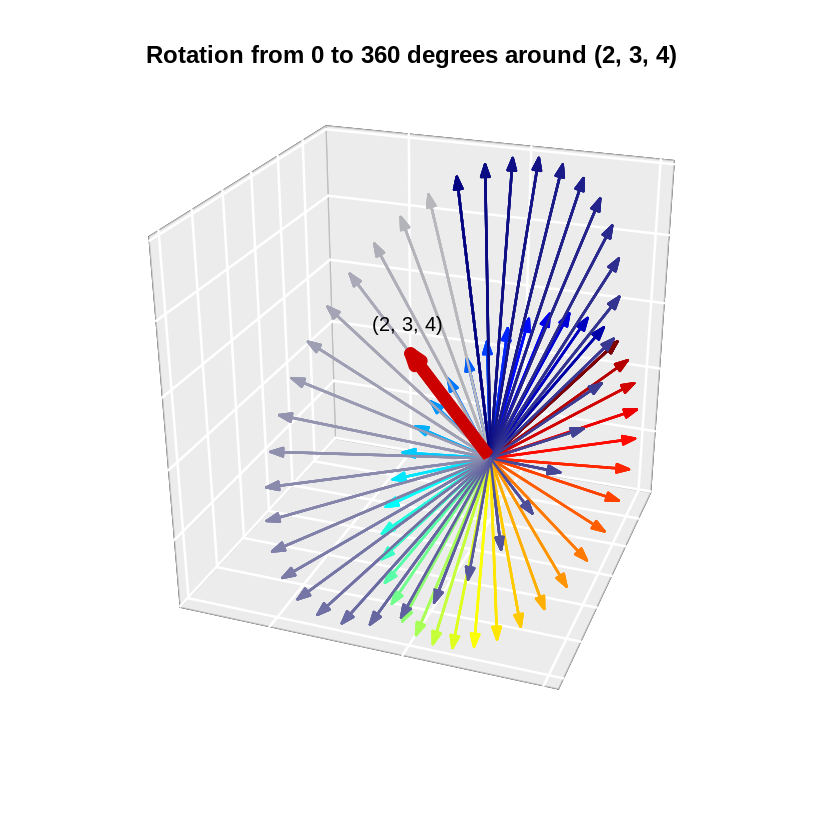

In [ ]:
ang <- c(seq(0,360,10),360)
n <- length(ang)

m <- matrix(0,n,6)
v <- c(3,-4,7)
for(i in 1:length(ang)){
  m[i,4:6] <- rotate.theta.around(c(v[1],v[2],v[3]), vecaxis, ang[i])
}

w <-  c(-4,-3,3)
u <- matrix(0,n,6)
for(i in 1:length(ang)){
  u[i,4:6] <- rotate.theta.around(c(w[1],w[2],w[3]), vecaxis, ang[i])
}

arrows3D(m[,1], m[,2], m[,3],
         m[,4], m[,5], m[,6],
         phi=25, theta=200,
         lwd = 2, d = 3, col=ramp.col (col = c("gray", "navyblue"), n = nrow(m), alpha = 1),
         axes=F,
         main= 'Rotation from 0 to 360 degrees around (2, 3, 4)',
         bty ="g", ticktype = "detailed")

arrows3D(u[,1], u[,2], u[,3],
         u[,4], u[,5], u[,6],
         phi=25, theta=200,
         lwd = 2, d = 3, col=jet.col (n = nrow(u), alpha = 1),
         axes=F,
         add=T,
         bty ="g", ticktype = "detailed")

arrows3D(0,0,0,2,3,4, lwd=10, col='red3', add=T)

text3D(2+1, 3+1, 4+1, '(2, 3, 4)',
       add=TRUE, colkey = FALSE)

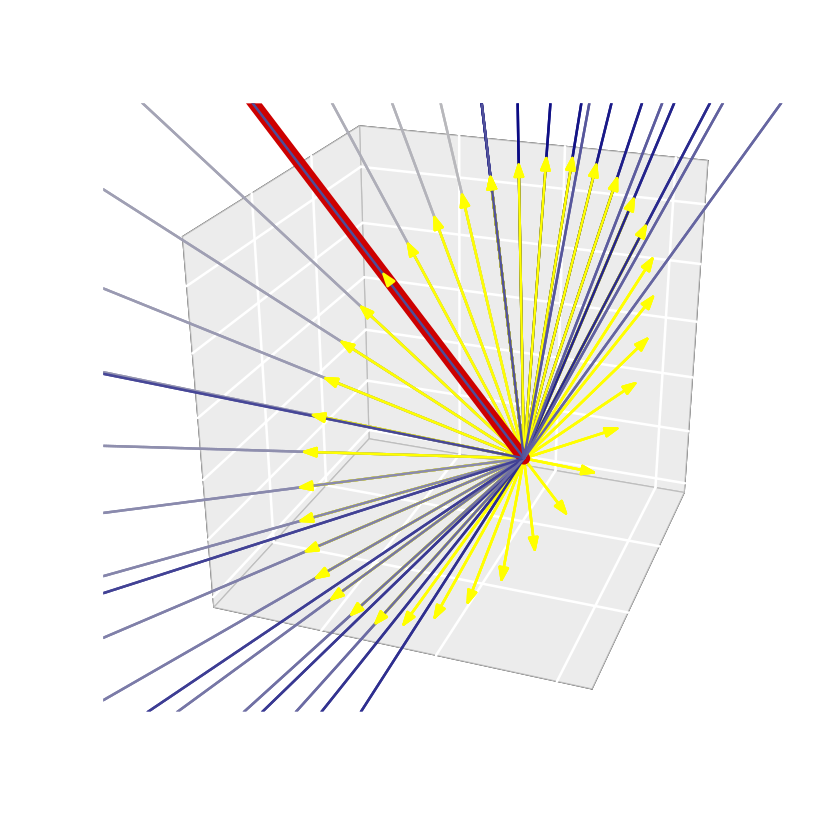

In [ ]:
ang <- c(seq(0,360,10),360)
n <- length(ang)

m <- matrix(0,n,6)
v <- c(3,-4,7)
for(i in 1:length(ang)){
  m[i,4:6] <- rotate.theta.around(c(v[1],v[2],v[3]), vecaxis, ang[i])
}

#Normalizing the vector that is rotated makes a difference?

no <- matrix(0,n,6)
vno <- c(3,-4,7)/sqrt(sum(v^2))
for(i in 1:length(ang)){
  no[i,4:6] <- rotate.theta.around(c(vno[1],vno[2],vno[3]), vecaxis, ang[i])
}


# Graphically it looks like it...

arrows3D(no[,1], no[,2], no[,3],
         no[,4], no[,5], no[,6],
         phi=25, theta=200,
         lwd = 2, d = 3,
         axes=F, col="yellow",
         bty ="g", ticktype = "detailed")

arrows3D(m[,1], m[,2], m[,3],
         m[,4], m[,5], m[,6],
         phi=25, theta=200, add=T,
         lwd = 2, d = 3, col=ramp.col (col = c("gray", "navyblue"), n = nrow(m), alpha = 1),
         axes=F,
         main= 'Rotation from 0 to 360 degrees around (2, 3, 4)',
         bty ="g", ticktype = "detailed")

arrows3D(0,0,0,2,3,4, lwd=10, col='red3', add=T)

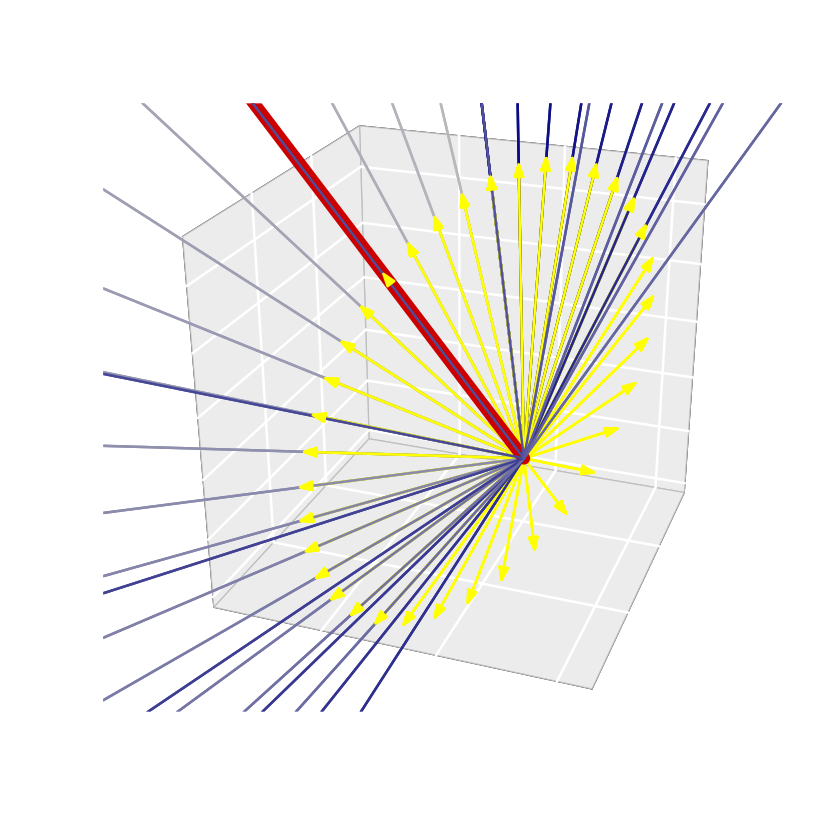

In [ ]:
# But the same happens just elongating the resultant vectors after rotating them... Hmmm...

arrows3D(no[,1], no[,2], no[,3],
         no[,4], no[,5], no[,6],
         phi=25, theta=200,
         lwd = 2, d = 3,
         axes=F, col="yellow",
         bty ="g", ticktype = "detailed")

arrows3D(no[,1], no[,2], no[,3],
         no[,4]*sqrt(sum(v^2)), no[,5]*sqrt(sum(v^2)), no[,6]*sqrt(sum(v^2)),
         phi=25, theta=200, add=T,
         lwd = 2, d = 3, col=ramp.col (col = c("gray", "navyblue"), n = nrow(m), alpha = 1),
         axes=F,
         bty ="g", ticktype = "detailed")

arrows3D(0,0,0,2,3,4, lwd=10, col='red3', add=T)

In [ ]:
# Numerically the results without and with normalization of the rotating vec are very close to sqrt(sum(v^2)):

head(m[,4:6]/no[,4:6])
range((m[,4:6]/no[,4:6])[,1])[2] - range((m[,4:6]/no[,4:6])[,1])[1]
range((m[,4:6]/no[,4:6])[,2])[2] - range((m[,4:6]/no[,4:6])[,2])[1]
range((m[,4:6]/no[,4:6])[,3])[2] - range((m[,4:6]/no[,4:6])[,3])[1]
summary((m[,4:6]/no[,4:6])[,1])
summary((m[,4:6]/no[,4:6])[,2])
summary((m[,4:6]/no[,4:6])[,3])

8.603384,8.602151,8.602679
8.602723,8.602297,8.602423
8.602617,8.601423,8.602665
8.602345,8.603138,8.602111
8.602458,8.601366,8.602340
8.602447,8.600842,8.603425


[1] 0.02530675

[1] 0.01323221

[1] 0.01400643

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.600   8.602   8.602   8.603   8.603   8.625 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.599   8.602   8.602   8.602   8.603   8.612 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.599   8.602   8.602   8.602   8.603   8.613 

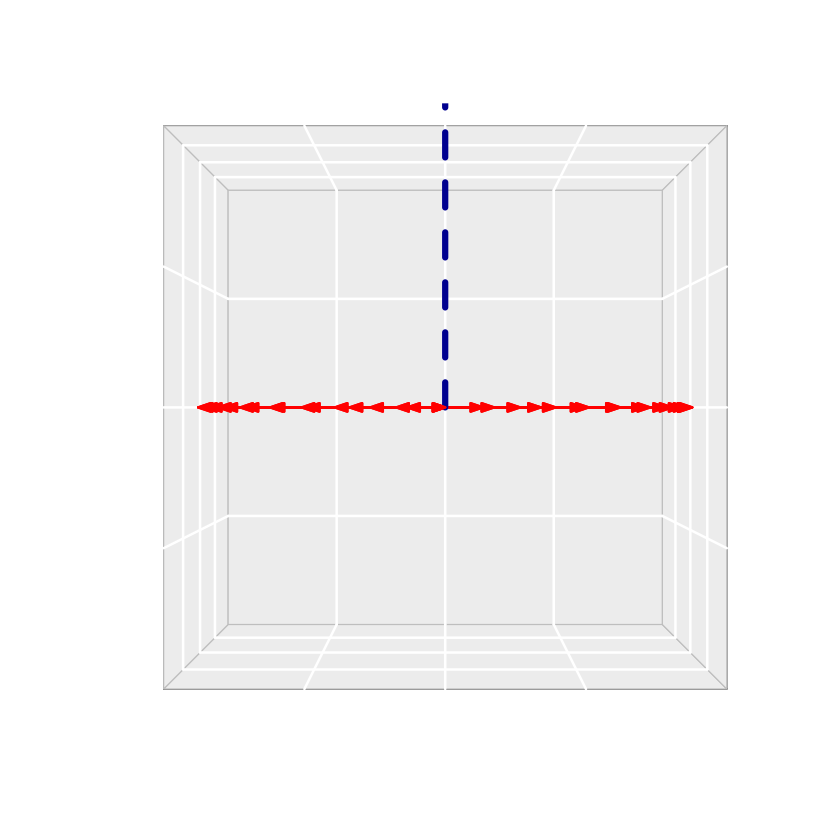

In [ ]:
ang <- c(seq(0,360,10),360)
n <- length(ang)

m <- matrix(0,n,6)
v <- c(1,0,0)
for(i in 1:length(ang)){
  m[i,4:6] <- rotate.theta.around(c(v[1],v[2],v[3]), c(0,1,0), ang[i])
}

arrows3D(m[,1], m[,2], m[,3],
         m[,4], m[,5], m[,6],
         phi=90, theta=0,
         lwd = 2, d = 3,
         axes=F, col="red",
         bty ="g", ticktype = "detailed")

arrows3D(0,0,0,0,1,0, add=T, lwd=5, lty=2)


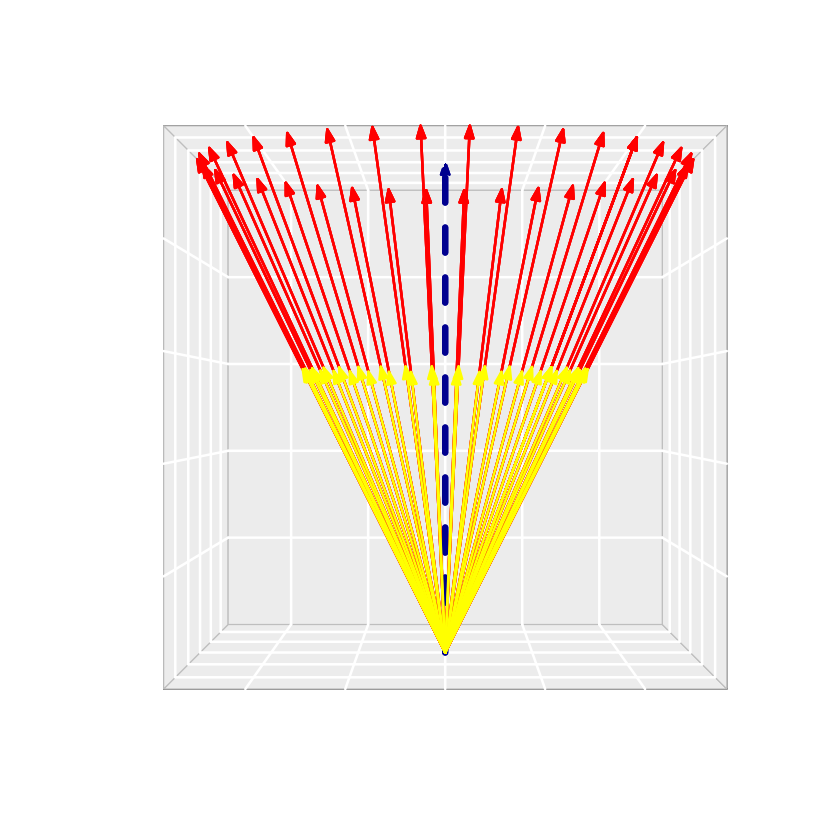

In [ ]:
# There doesn't seem to be a need to normalize (1,1,1)

ang <- c(seq(0,360,10),360)
n <- length(ang)

m <- matrix(0,n,6)
v <- c(1,1,1)
for(i in 1:length(ang)){
  m[i,4:6] <- rotate.theta.around(c(v[1],v[2],v[3]), c(0,1,0), ang[i])
}

arrows3D(m[,1], m[,2], m[,3],
         m[,4], m[,5], m[,6],
         phi=90, theta=0,
         lwd = 2, d = 3,
         axes=F, col="red",
         bty ="g", ticktype = "detailed")

arrows3D(0,0,0,0,1,0, add=T, lwd=5, lty=2)

mm <- matrix(0,n,6)
vv <- c(1,1,1)/sqrt(3)
for(i in 1:length(ang)){
  mm[i,4:6] <- rotate.theta.around(c(vv[1],vv[2],vv[3]), c(0,1,0), ang[i])
}

arrows3D(mm[,1], mm[,2], mm[,3],
         mm[,4], mm[,5], mm[,6],
         phi=90, theta=0,
         lwd = 2, d = 3,
         axes=F, col="yellow", add=T,
         bty ="g", ticktype = "detailed")

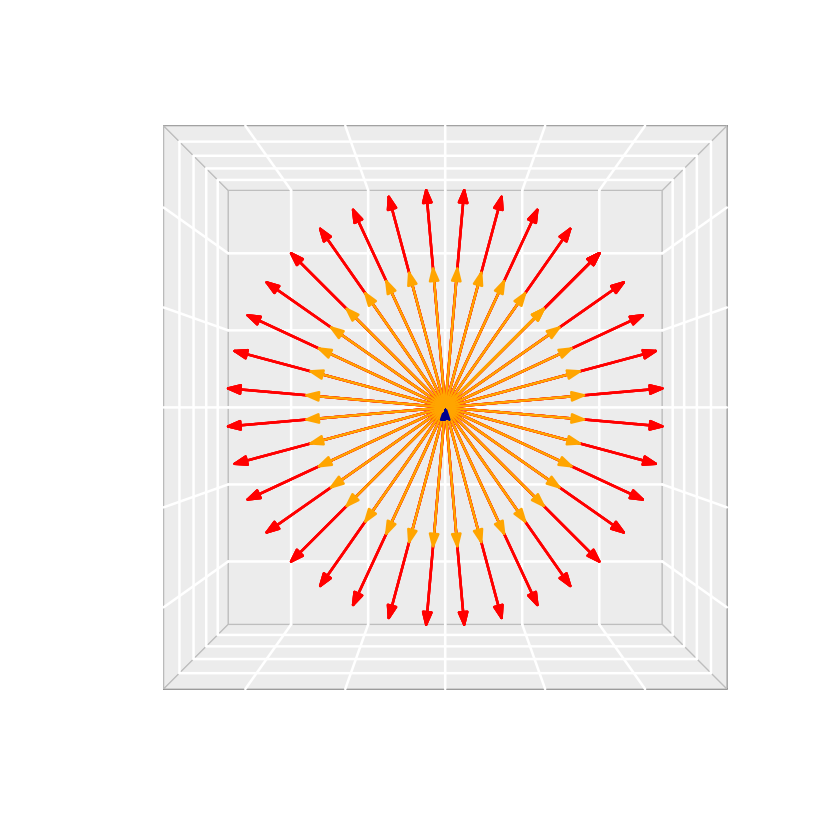

In [ ]:
arrows3D(m[,1], m[,2], m[,3],
         m[,4], m[,5], m[,6],
         phi=0, theta=0,
         lwd = 2, d = 3,
         axes=F, col="red",
         bty ="g", ticktype = "detailed")

arrows3D(0,0,0,0,1,0, add=T, lwd=5, lty=2)

arrows3D(mm[,1], mm[,2], mm[,3],
         mm[,4], mm[,5], mm[,6],
         phi=0, theta=0,
         lwd = 2, d = 3,
         axes=F, col="orange", add=T,
         bty ="g", ticktype = "detailed")

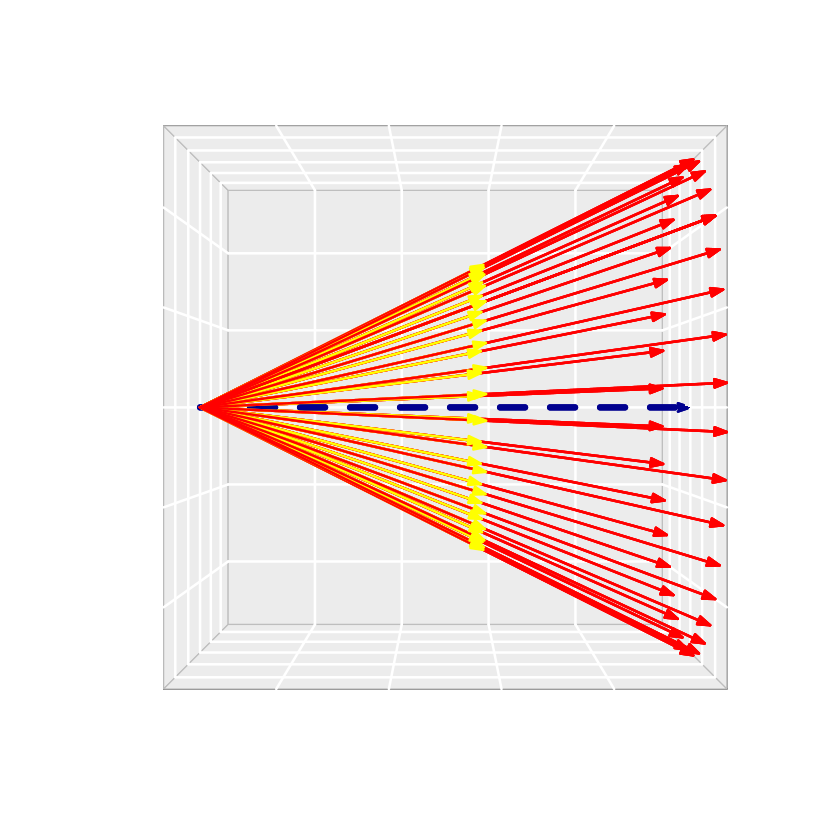

In [ ]:
arrows3D(m[,1], m[,2], m[,3],
         m[,4], m[,5], m[,6],
         phi=0, theta=90,
         lwd = 2, d = 3,
         axes=F, col="red",
         bty ="g", ticktype = "detailed")

arrows3D(0,0,0,0,1,0, add=T, lwd=5, lty=2)

arrows3D(mm[,1], mm[,2], mm[,3],
         mm[,4], mm[,5], mm[,6],
         phi=0, theta=90,
         lwd = 2, d = 3,
         axes=F, col="yellow", add=T,
         bty ="g", ticktype = "detailed")

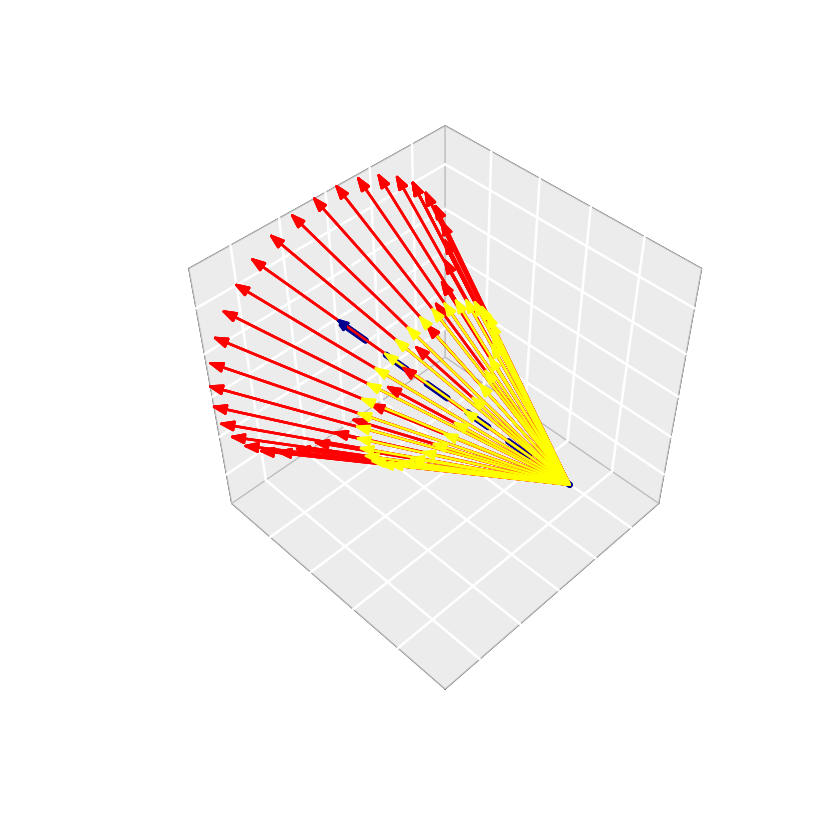

In [ ]:
arrows3D(m[,1], m[,2], m[,3],
         m[,4], m[,5], m[,6],
         phi=45, theta=-45,
         lwd = 2, d = 3,
         axes=F, col="red",
         bty ="g", ticktype = "detailed")

arrows3D(0,0,0,0,1,0, add=T, lwd=5, lty=2)

arrows3D(mm[,1], mm[,2], mm[,3],
         mm[,4], mm[,5], mm[,6],
         phi=45, theta=45,
         lwd = 2, d = 3,
         axes=F, col="yellow", add=T,
         bty ="g", ticktype = "detailed")